In [20]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [21]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# use the citipy mod to determine city based on latitude and longitude
from citipy import citipy

In [24]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

barrow us
atuona pf
mataura pf
atuona pf
ocos gt
vila vu
ambon id
san andres co
busselton au
hermanus za
umzimvubu za
punta arenas cl
codrington ag
cherskiy ru
torbay ca
ostrovnoy ru
mahebourg mu
sao filipe cv
rikitea pf
dimbokro ci
busselton au
lebu cl
rikitea pf
mahina pf
lavrentiya ru
ushuaia ar
port alfred za
marcona pe
guilin cn
mount isa au
zhaotong cn
broome au
rikitea pf
uwayl sd
samarai pg
chudniv ua
mogadishu so
trinidad cu
hithadhoo mv
ila ng
huilong cn
katsuura jp
chuy uy
nunoa pe
butaritari ki
hami cn
leningradskiy ru
hobart au
bandarbeyla so
umm kaddadah sd
grand gaube mu
ilulissat gl
kodiak us
tautira pf
rikitea pf
taolanaro mg
hammerfest no
dingle ie
cayenne gf
avarua ck
grand river south east mu
harper lr
east london za
sambava mg
san quintin mx
ocos gt
nizhneyansk ru
uriangato mx
ushuaia ar
saint-philippe re
hermanus za
nikolskoye ru
khrebtovaya ru
salalah om
otavi na
rikitea pf
rikitea pf
thompson ca
busselton au
taolanaro mg
busselton au
mataura pf
hasaki jp
saskyla

chokurdakh ru
port elizabeth za
altena de
khatanga ru
busselton au
attawapiskat ca
san patricio mx
xingyi cn
puerto ayora ec
khatanga ru
dikson ru
port elizabeth za
havoysund no
mutare zw
hilo us
qaanaaq gl
busselton au
avarua ck
bredasdorp za
mahebourg mu
acajutla sv
rikitea pf
mahebourg mu
nuevitas cu
riosucio co
hilo us
saint-philippe re
tilichiki ru
san quintin mx
port alfred za
punta arenas cl
ishikari jp
cairns au
half moon bay us
taburi ph
rikitea pf
namatanai pg
den helder nl
kimberley za
ushuaia ar
hermanus za
comodoro rivadavia ar
punta arenas cl
khatanga ru
cape town za
aykhal ru
oxford ca
saldanha za
oranjestad an
sechura pe
hermanus za
atuona pf
naze jp
mataura pf
half moon bay us
port lincoln au
lagoa pt
severo-kurilsk ru
havoysund no
churachandpur in
bluff nz
hilo us
lingao cn
sorvag fo
nsanje mw
ushuaia ar
illoqqortoormiut gl
satitoa ws
bluff nz
half moon bay us
jamestown sh
prince rupert ca
porto novo cv
samusu ws
mahebourg mu
new norfolk au
cape town za
mehamn no
anta

In [25]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [26]:
#import the requests library
import requests
#import the API key
from config import weather_api_key


In [27]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [28]:
# import the time library and the datetime mod from the datetime library
import time
from datetime import datetime


In [29]:
# Create an empty list to hold the weather data.

city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | ocos
Processing Record 5 of Set 1 | vila
Processing Record 6 of Set 1 | ambon
Processing Record 7 of Set 1 | san andres
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | codrington
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | ostrovnoy
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | sao filipe
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | dimbokro
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | mahina
Processing Record 22 of Set 1 | lavrentiya
Processing Record 23 of Set 

Processing Record 36 of Set 4 | chokurdakh
Processing Record 37 of Set 4 | mount gambier
Processing Record 38 of Set 4 | batagay-alyta
Processing Record 39 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 4 | quelimane
Processing Record 41 of Set 4 | peniche
Processing Record 42 of Set 4 | saint anthony
Processing Record 43 of Set 4 | noyabrsk
Processing Record 44 of Set 4 | padang
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | fairbanks
Processing Record 47 of Set 4 | cedar city
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | labuhan
Processing Record 50 of Set 4 | fuzhou
Processing Record 1 of Set 5 | mabai
Processing Record 2 of Set 5 | rolim de moura
City not found. Skipping...
Processing Record 3 of Set 5 | priiskovyy
Processing Record 4 of Set 5 | verkhovye
Processing Record 5 of Set 5 | cheuskiny
City not found. Skipping...
Processing Record 6 of Set 5 | surt
Processing Record 7 of Set 5 | bashtanka


Processing Record 25 of Set 8 | boa vista
Processing Record 26 of Set 8 | marica
Processing Record 27 of Set 8 | port blair
Processing Record 28 of Set 8 | toyooka
Processing Record 29 of Set 8 | lock haven
Processing Record 30 of Set 8 | hovd
Processing Record 31 of Set 8 | itoman
Processing Record 32 of Set 8 | sola
Processing Record 33 of Set 8 | sisimiut
Processing Record 34 of Set 8 | dingzhou
Processing Record 35 of Set 8 | krutikha
Processing Record 36 of Set 8 | tarakan
Processing Record 37 of Set 8 | shibarghan
City not found. Skipping...
Processing Record 38 of Set 8 | tigil
Processing Record 39 of Set 8 | san carlos de bariloche
Processing Record 40 of Set 8 | hojai
Processing Record 41 of Set 8 | kollumerland
City not found. Skipping...
Processing Record 42 of Set 8 | saint george
Processing Record 43 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 44 of Set 8 | castro
Processing Record 45 of Set 8 | puerto rondon
Processing Record 46 of Set 8 |

Processing Record 8 of Set 12 | byron bay
Processing Record 9 of Set 12 | parker
Processing Record 10 of Set 12 | ixtapa
Processing Record 11 of Set 12 | bubaque
Processing Record 12 of Set 12 | severomorsk
Processing Record 13 of Set 12 | otradnoye
Processing Record 14 of Set 12 | talnakh
Processing Record 15 of Set 12 | ardabil
Processing Record 16 of Set 12 | renqiu
Processing Record 17 of Set 12 | wattegama
Processing Record 18 of Set 12 | mamou
Processing Record 19 of Set 12 | warman
Processing Record 20 of Set 12 | idrinskoye
Processing Record 21 of Set 12 | qixingtai
Processing Record 22 of Set 12 | talaya
Processing Record 23 of Set 12 | jeremie
Processing Record 24 of Set 12 | yeniseysk
Processing Record 25 of Set 12 | ucluelet
Processing Record 26 of Set 12 | alvand
Processing Record 27 of Set 12 | podgornoye
Processing Record 28 of Set 12 | covington
Processing Record 29 of Set 12 | takoradi
Processing Record 30 of Set 12 | wewak
Processing Record 31 of Set 12 | hanmer sprin

In [30]:
len(city_data)

546

In [31]:
# convert the array of dictionaries to a Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,19.42,93,100,9.22,US,2022-05-03 02:46:45
1,Atuona,-9.8000,-139.0333,79.61,79,74,15.48,PF,2022-05-03 02:56:03
2,Mataura,-46.1927,168.8643,64.06,51,4,1.74,NZ,2022-05-03 02:55:48
3,Ocos,14.5094,-92.1933,84.02,73,2,7.81,GT,2022-05-03 02:56:04
4,Vila,42.0304,-8.1588,42.69,80,25,5.46,PT,2022-05-03 02:56:05
5,Ambon,-3.6954,128.1814,91.54,62,20,3.44,ID,2022-05-03 02:56:05
6,San Andres,12.5847,-81.7006,82.42,89,40,2.30,CO,2022-05-03 02:56:06
7,Busselton,-33.6500,115.3333,62.26,58,47,12.59,AU,2022-05-03 02:54:33
8,Hermanus,-34.4187,19.2345,60.98,95,23,6.44,ZA,2022-05-03 02:53:11
9,Punta Arenas,-53.1500,-70.9167,42.12,75,100,16.53,CL,2022-05-03 02:53:07


In [32]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [34]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-05-03 02:46:45,71.2906,-156.7887,19.42,93,100,9.22
1,Atuona,PF,2022-05-03 02:56:03,-9.8000,-139.0333,79.61,79,74,15.48
2,Mataura,NZ,2022-05-03 02:55:48,-46.1927,168.8643,64.06,51,4,1.74
3,Ocos,GT,2022-05-03 02:56:04,14.5094,-92.1933,84.02,73,2,7.81
4,Vila,PT,2022-05-03 02:56:05,42.0304,-8.1588,42.69,80,25,5.46


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

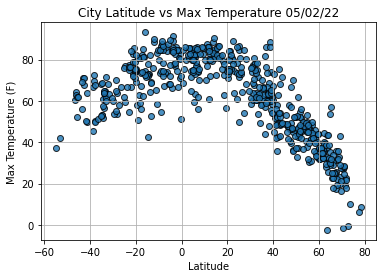

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

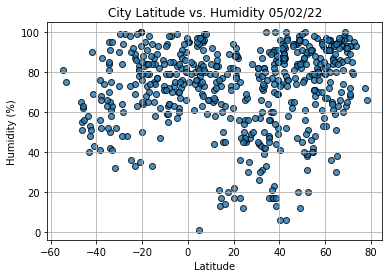

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

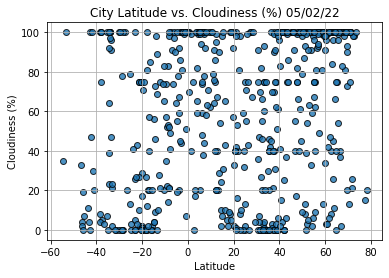

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

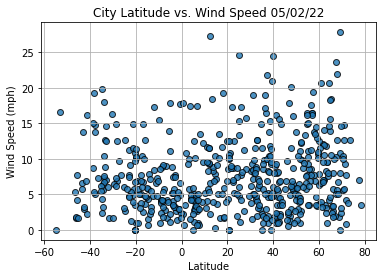

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [67]:
# import linregress
from scipy.stats import linregress

#create a func to create perform linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [68]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-05-03 02:46:45,71.2906,-156.7887,19.42,93,100,9.22
3,Ocos,GT,2022-05-03 02:56:04,14.5094,-92.1933,84.02,73,2,7.81
4,Vila,PT,2022-05-03 02:56:05,42.0304,-8.1588,42.69,80,25,5.46
6,San Andres,CO,2022-05-03 02:56:06,12.5847,-81.7006,82.42,89,40,2.30
11,Cherskiy,RU,2022-05-03 02:56:08,68.7500,161.3000,32.67,97,81,1.79


In [69]:
# create northern and southern hemisphere data frames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [71]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

NameError: name 'x_value' is not defined

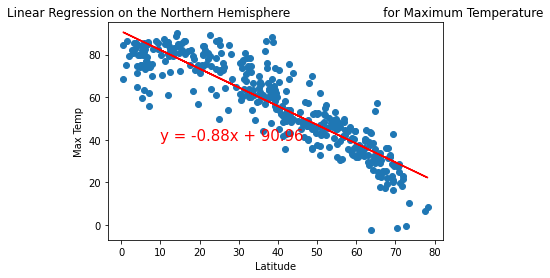

r_value: -0.8874701812802013


In [76]:
#linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# call the func
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (10,40))
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")

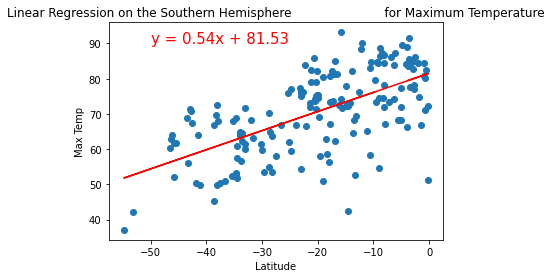

r_value: 0.6251565367013829


In [77]:
#linear regression on the northern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# call the func
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (-50,90))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

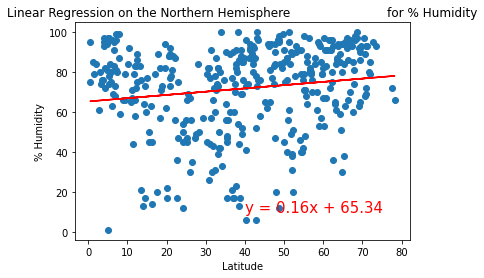

r_value: 0.15134808206849892


In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")

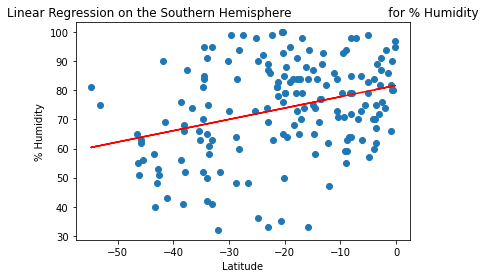

r_value: 0.31905946476458447


In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 


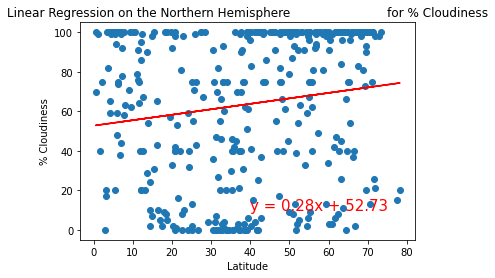

r_value: 0.15065239636480118


In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")

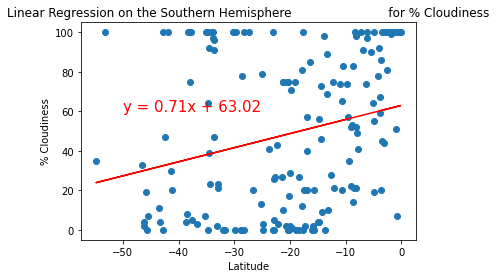

r_value: 0.2463667392266288


In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

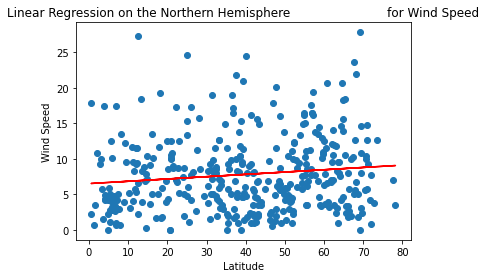

r_value: 0.12584838895299935


In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")

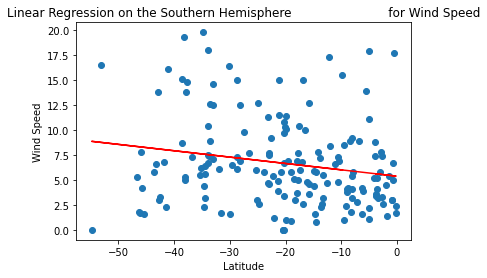

r_value: -0.19165208810595702


In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"r_value: {r_value}")

The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 